
- distribution of length of texts by article
- distribution of length of texts in all

- no. of cases per article
- no. of documents per article

- distribution of cases by year

In [7]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import pandas as pd
import numpy as np

import re

In [8]:
import sys
sys.path.append(f'../../src/python')

from balance_split_data import create_label, balance_unique_id, \
create_balanced_excluded, create_train_test_excluded, group_by_case, create_feature_label


In [9]:
df = pd.read_json(r"../../data/processed/pre-processed_merged_2023_04_03.json")

In [10]:
# no of cases by article_new
df.groupby('article_new')['case_num'].nunique().sort_index()

article_new
article6(1)(b)    1281
article6(2)        204
article8(1)         32
article8(2)         57
article8(3)          9
referral            58
simplified        3194
Name: case_num, dtype: int64

In [11]:
# no of documents by article_new
df.groupby('article_new')['file'].nunique().sort_index()

article_new
article6(1)(b)    1281
article6(2)        205
article8(1)         32
article8(2)         57
article8(3)          9
referral            59
simplified        3194
Name: file, dtype: int64

In [12]:
# no of rows by article
df['article_new'].value_counts().sort_index()

article6(1)(b)    4398
article6(2)        672
article8(1)         94
article8(2)        170
article8(3)         28
referral           150
simplified        3194
Name: article_new, dtype: int64

In [13]:
df[~df['article_new'].isin(['referral', 'simplified'])].groupby('section_fin')['case_num'].nunique()

section_fin
Competitive Assessment       1331
Concentration & Dimension    1537
Market Definition            1050
Parties & Operation          1441
Name: case_num, dtype: int64

In [14]:
# no of cases by year
df.groupby('year')['case_num'].nunique()

year
2004     99
2005    232
2006    277
2007    303
2008    241
2009    178
2010    203
2011    253
2012    174
2013    198
2014    232
2015    261
2016    303
2017    264
2018    335
2019    319
2020    305
2021    337
2022    287
2023      6
Name: case_num, dtype: int64

In [15]:
df.groupby('article')['case_num'].nunique().sort_index()

article
article6(1)(b)    1281
article6(2)        204
article8(1)         32
article8(2)         57
article8(3)          9
Name: case_num, dtype: int64

Phase 2 distribution

In [16]:
df['phase2'].value_counts()

0             5070
simplified    3194
1              292
referral       150
Name: phase2, dtype: int64

In [17]:
print(df[df['phase2']==0]['case_num'].nunique())
print(df[df['phase2']==1]['case_num'].nunique())

1485
98


WC distribution

In [18]:
df['wc'].value_counts()

0              4492
simplified     3194
1               842
referral        150
article8(3)      28
Name: wc, dtype: int64

In [19]:
print(df[df['wc']==0]['case_num'].nunique())
print(df[df['wc']==1]['case_num'].nunique())

#261 coz there's same case_num 6.2 and 8.2

1313
260


Labels

In [20]:
data = df.copy()
#data = data[data['section_fin']=="Competitive Assessment"]
label_name = "phase2"
df1 = create_label(data, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1, random_seed=42)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded, random_state=42)
df_train_grouped, df_test_grouped, df_test1_grouped, df_excluded_grouped = group_by_case(df_train, df_test, df_test1, df_excluded)

Total decisions: 1583
0    1485
1      98
Name: label, dtype: int64
Balancing...
Total decisions: 196
Labels distribution: 
 0    98
1    98
Name: 0, dtype: int64
Training set shape: (157,) (157,)
Test set shape: (40,) (40,)
Creating df_train 1: 78 0: 79
Creating df_test1 1: 20 0: 20
Creating df_test concatenated with df_excluded with len: 1386
Creating df_test 1: 20 0: 1406
Grouping df_train by case_num 1: 78 0: 79
Grouping df_test by case_num 1: 20 0: 1406
Grouping df_test1 by case_num 1: 20 0: 20
Grouping df_excluded by case_num with len: 1386


In [33]:
df2 = df1.groupby(['case_num', 'article', 'section_fin'])['text_clean'].agg(' '.join).reset_index()

In [34]:
df2['section_fin'].value_counts()

Concentration & Dimension    1538
Parties & Operation          1441
Competitive Assessment       1331
Market Definition            1051
Name: section_fin, dtype: int64

In [35]:
df2['article'].value_counts()

article6(1)(b)    4398
article6(2)        671
article8(2)        170
article8(1)         94
article8(3)         28
Name: article, dtype: int64

In [37]:
df1['section_fin'].value_counts()

Concentration & Dimension    1538
Parties & Operation          1442
Competitive Assessment       1331
Market Definition            1051
Name: section_fin, dtype: int64

In [14]:
df1.groupby('section_fin')['case_num'].nunique()

section_fin
Competitive Assessment       1331
Concentration & Dimension    1537
Market Definition            1050
Parties & Operation          1441
Name: case_num, dtype: int64

In [15]:
df1.groupby('article')['case_num'].nunique()

article
article6(1)(b)    1281
article6(2)        204
article8(1)         32
article8(2)         57
article8(3)          9
Name: case_num, dtype: int64

In [16]:
data = df.copy()
label_name = "wc"
df1 = create_label(data, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded)

Total decisions: 1574
0    1313
1     261
Name: label, dtype: int64
Balancing...
Total decisions: 522
Labels distribution: 
 0    261
1    261
Name: 0, dtype: int64
Training set shape: (417,) (417,)
Test set shape: (105,) (105,)
Creating df_train 1: 208 0: 209
Creating df_test1 1: 53 0: 52
Creating df_test concatenated with df_excluded with len: 1052
Creating df_test 1: 53 0: 1104


In [17]:
df1['wc'].value_counts()

0    4492
1     842
Name: wc, dtype: int64

In [21]:
data = df.copy()
label_name = "competition"
df1 = create_label(df, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded)

Total decisions: 1583
0    1313
1     270
Name: label, dtype: int64
Balancing...
Total decisions: 540
Labels distribution: 
 1    270
0    270
Name: 0, dtype: int64
Training set shape: (432,) (432,)
Test set shape: (108,) (108,)
Creating df_train 1: 215 0: 216
Creating df_test1 1: 54 0: 54
Creating df_test concatenated with df_excluded with len: 1043
Creating df_test 1: 54 0: 1097


In [20]:
df1['competition'].value_counts()

0    4492
1     870
Name: competition, dtype: int64

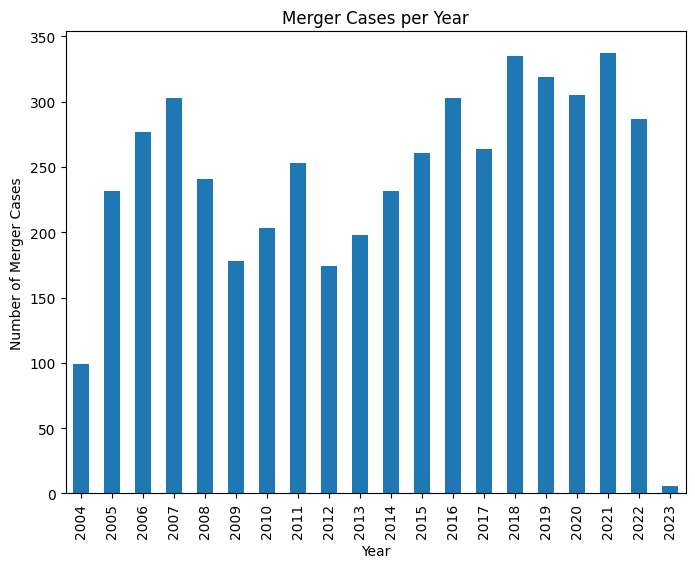

In [18]:
import matplotlib.pyplot as plt

# Group the DataFrame by year_text and count the number of unique case_num values
grouped = df.groupby('year')['case_num'].nunique()

# Create a bar chart of the grouped data
ax = grouped.plot(kind='bar', figsize=(8,6))

# Set the chart title and axis labels
ax.set_title('Merger Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Merger Cases')

# Display the chart
plt.show()

### Distribution of length of texts

<AxesSubplot: >

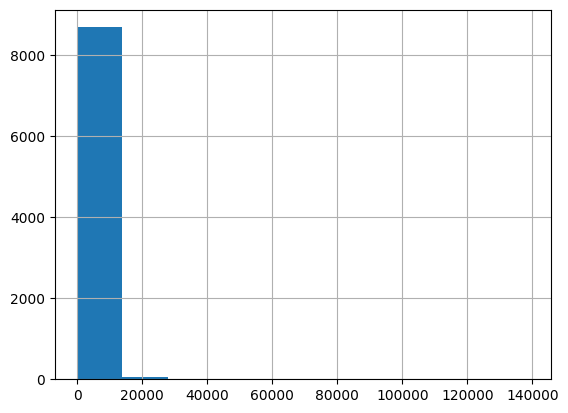

In [138]:
pd.Series(df['count_text']).hist(bins = 10)


Distribution without simplified and referral

<AxesSubplot: >

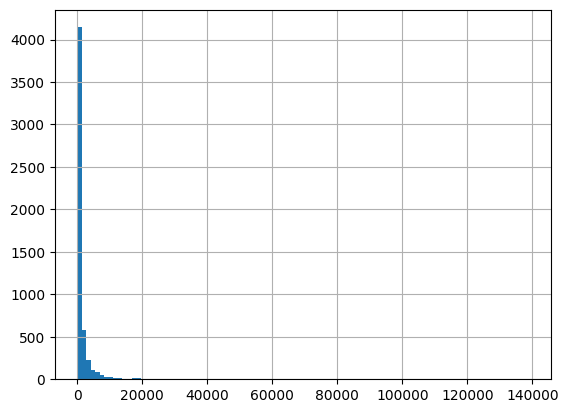

In [139]:
pd.Series(df[~df['article_new'].isin(['referral','simplified'])]['count_text']).hist(bins = 100)

In [140]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count_text'])

5371

In [141]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count_text'])/len(df.index)

0.612498574523891

<AxesSubplot: >

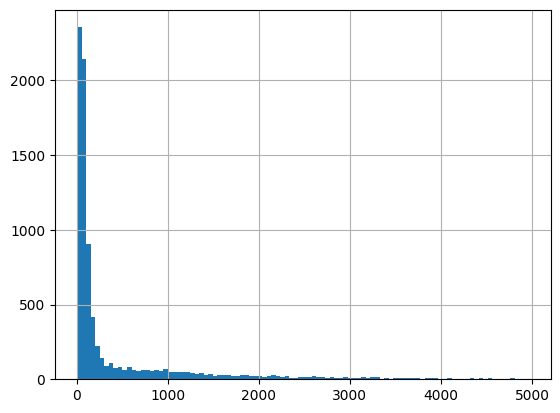

In [142]:
pd.Series(df[df['count_text']<5000]['count_text']).hist(bins = 100)

<AxesSubplot: >

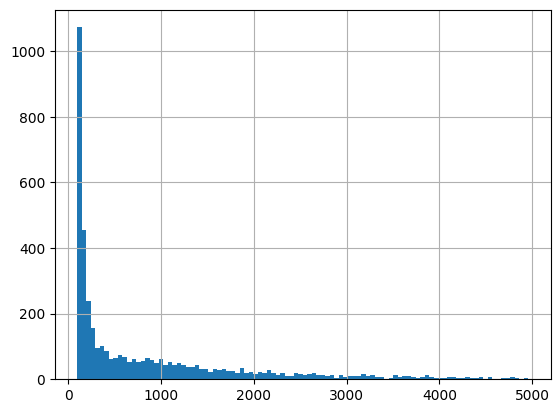

In [143]:
pd.Series(df[(df['count_text'] >= 100) & (df['count_text'] <= 5000)]['count_text']).hist(bins = 100)

In [144]:
len(df[(df['count_text'] >= 21) & (df['count_text'] <= 5000)])


8095

In [145]:
print(len(df[(df['count_text'] >= 100) & (df['count_text'] <= 5000)])/len(df.index))

0.47724940130003424


In [146]:
df[(df['count_text'] > 5000)]['sec_text']

7        A. General overview\ni) Pre-press printing tec...
121      A.  Relevant markets\n9.  The parties claim th...
134      28.  News Corp and BSkyB are active in various...
331      7.  The  main  markets  concerned  with  the  ...
580      V.3.1 (cid:150) INTRODUCTION\nV.3.1.1 (cid:150...
                               ...                        
10750    4.1.  Legal framework\n(101)  When the parties...
10754    (7)  The Parties’ activities overlap in aerosp...
10755    5.1.  Legal framework\n(114)  Under paragraphs...
10759    4.1.  Introduction\n(6)  The Parties are activ...
10768    5.1.  Quay cranes\n(38)  Quay cranes are crane...
Name: sec_text, Length: 359, dtype: object

In [147]:
print("min:", min(df['count_text']), 
    "\nmax:", max(df['count_text']))

min: 9 
max: 138766


In [148]:
df[df['count_text']==max(df['count_text'])]

,year,article_new,case_num,file,section_fin,len_pdf,sec_text,count,text_clean,count_text,phase2,wc,competition
10231,2021,article8(2),M.9564,\M_9564_7982342_9230_3,Competitive Assessment,810,(705) Under Article 2(2) and (3) of the Merge...,238795,article merger regulation commission ass propo...,138766,1,1,0
